# **Implementación de modelos**

## **Librerías y modulos necesarios**

In [49]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

## **Modelo de Series de tiempo**

In [50]:
data = pd.read_csv('../data_tasas/data_to_models.csv')

In [51]:
data.head()

,Unnamed: 0,region_Def,Nombre_Departamento_Def,Nombre_Municipio_Def,Nombre_Departamento_Res,Nombre_Municipio_Res,sitio_def,año_def,mes_def,sexo,estado_civil,grupo_edad,nivel_edu,seg_social,asistencia_med,causa_basica,Fecha
0,32246,Andina,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,MEDELLÍN,Casa,2009,1,Femenino,"Unión Libre, Divorciado/Otro",40-54 años,Secundaria,Subsidiado,SI,Parte no especificada,2009-01
1,32247,Andina,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,MEDELLÍN,Casa,2009,1,Femenino,Viudo,65-74 años,Primaria,Contributivo,SI,Parte no especificada,2009-01
2,32248,Andina,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,SABANETA,Hospital o Clínica,2009,1,Femenino,Casado,40-54 años,Secundaria,Contributivo,SI,Parte no especificada,2009-01
3,32249,Andina,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,BELLO,Hospital o Clínica,2009,1,Femenino,Casado,40-54 años,Secundaria,Contributivo,SI,Parte no especificada,2009-01
4,32250,Andina,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,MEDELLÍN,Casa,2009,1,Femenino,"Unión Libre, Divorciado/Otro",40-54 años,Secundaria,Contributivo,SI,Parte no especificada,2009-01


In [52]:
data_sin_2023 = data[(data['año_def'] >= 2009) & (data['año_def'] <= 2022)]
data_2023 = data[data['año_def'] == 2023]

In [53]:
# Crea una columna tipo fecha
data_sin_2023['fecha'] = pd.to_datetime(data_sin_2023['año_def'].astype(str) + '-' + data_sin_2023['mes_def'].astype(str) + '-01')

# Agrupa por mes y cuenta cuántas muertes hubo
df_ts = data_sin_2023.groupby('fecha').size().reset_index(name='y')

# Prophet necesita que las columnas se llamen 'ds' (fecha) y 'y' (valor)
df_ts = df_ts.rename(columns={'fecha': 'ds'})


In [54]:
df_ts

,ds,y
0,2009-01-01,174
1,2009-02-01,140
2,2009-03-01,169
3,2009-04-01,147
4,2009-05-01,173
...,...,...
163,2022-08-01,274
164,2022-09-01,267
165,2022-10-01,300
166,2022-11-01,248


In [55]:
# Crea una columna tipo fecha
data_2023['fecha'] = pd.to_datetime(data_2023['año_def'].astype(str) + '-' + data_2023['mes_def'].astype(str) + '-01')

# Agrupa por mes y cuenta cuántas muertes hubo
df_ts_2023 = data_2023.groupby('fecha').size().reset_index(name='y')

# Prophet necesita que las columnas se llamen 'ds' (fecha) y 'y' (valor)
df_ts_2023 = df_ts_2023.rename(columns={'fecha': 'ds'})

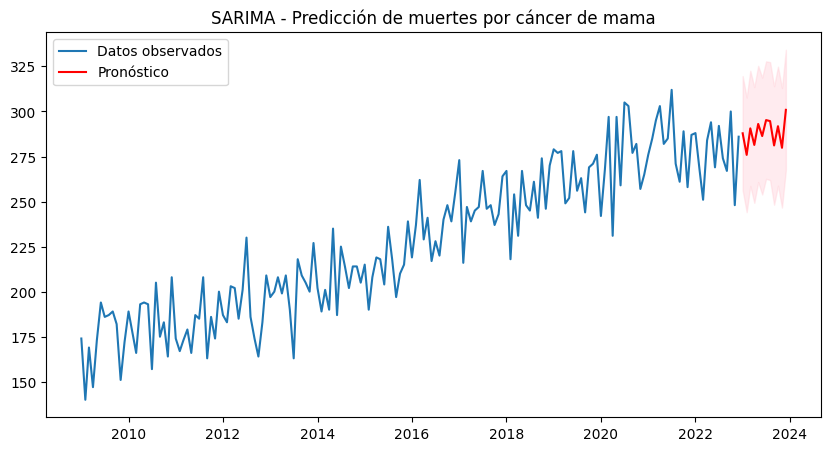

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suponiendo que tienes un DataFrame df_ts con columnas: 'ds' y 'y'
df_ts = df_ts.set_index('ds')  # usar fecha como índice

# Ajustar modelo SARIMA (parámetros iniciales: orden=(1,1,1), estacional=(1,1,1,12) para datos mensuales)
model = SARIMAX(df_ts['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Predecir 12 meses adelante
forecast = results.get_forecast(steps=12)
predicted = forecast.predicted_mean
ci = forecast.conf_int()

# Graficar
plt.figure(figsize=(10,5))
plt.plot(df_ts['y'], label='Datos observados')
plt.plot(predicted, label='Pronóstico', color='red')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA - Predicción de muertes por cáncer de mama')
plt.legend()
plt.show()


In [57]:
# Convertir a DataFrame con columnas 'fecha', 'pronóstico', 'límite_inferior', 'límite_superior'
df_forecast = pd.DataFrame({
    'fecha': predicted.index,
    'pronostico': predicted.values,
    'limite_inferior': ci.iloc[:, 0].values,
    'limite_superior': ci.iloc[:, 1].values
})
df_forecast.rename(columns={'fecha': 'ds'}, inplace=True)
df_forecast

,ds,pronostico,limite_inferior,limite_superior
0,2023-01-01,287.891146,256.156660,319.625633
1,2023-02-01,275.915856,244.110617,307.721095
2,2023-03-01,290.639751,258.675298,322.604204
3,2023-04-01,281.416158,249.297017,313.535299
4,2023-05-01,293.073255,260.800035,325.346475
5,2023-06-01,286.345971,253.919409,318.772532
6,2023-07-01,295.216699,262.637517,327.795882
7,2023-08-01,294.650299,261.919207,327.381390
8,2023-09-01,281.135691,248.253392,314.017989
9,2023-10-01,291.835979,258.803166,324.868791


In [58]:
df_ts_2023

,ds,y
0,2023-01-01,288
1,2023-02-01,287
2,2023-03-01,273
3,2023-04-01,268
4,2023-05-01,256
5,2023-06-01,290
6,2023-07-01,271
7,2023-08-01,265
8,2023-09-01,287
9,2023-10-01,274


In [59]:

# Unir reales y predichos
df_eval = pd.merge(df_ts_2023, df_forecast, on='ds')

In [60]:
from sklearn.metrics import *
import numpy as np
mae = mean_absolute_error(df_eval['y'], df_eval['pronostico'])
rmse = mean_squared_error(df_eval['y'], df_eval['pronostico'])
rmse = np.sqrt(rmse)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 16.07
RMSE: 19.64


In [61]:
# R^2 Score (coeficiente de determinación)
r2 = r2_score(df_eval['y'], df_eval['pronostico'])
print(f"R^2 Score: {r2:.2f}")

R^2 Score: -0.22


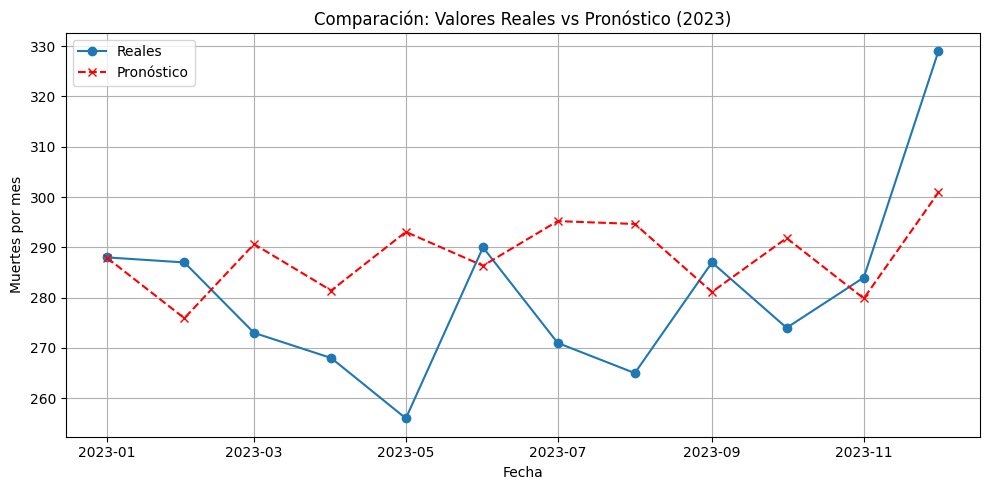

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_eval['ds'], df_eval['y'], marker='o', label='Reales')
plt.plot(df_eval['ds'], df_eval['pronostico'], marker='x', label='Pronóstico', linestyle='--', color='red')
plt.title('Comparación: Valores Reales vs Pronóstico (2023)')
plt.xlabel('Fecha')
plt.ylabel('Muertes por mes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Modelo GeoEspacial**